In [6]:
import numpy as np
import pandas as pd
import datetime as datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import quandl
quandl.ApiConfig.api_key = 'JgrixskwB3MtGDkJtxms'
%matplotlib inline

In [3]:
airline = pd.read_csv("airline_passengers.csv",index_col='Month')

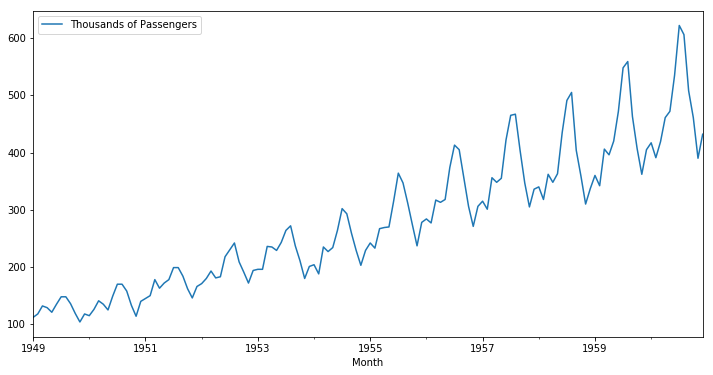

In [4]:
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)
airline.plot(figsize=(12,6));

In [ ]:
# Is this a linear trend or an exponential trend? Use ETS to decompose this to find out
# from statsmodels.tsa.seasonal import seasonal_decompose
# look at peaks of graph. is it linear or does it kind of curve up? maybe it's exponential so use multiplicative

In [8]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

In [11]:
result.seasonal.head()

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
Name: Thousands of Passengers, dtype: float64

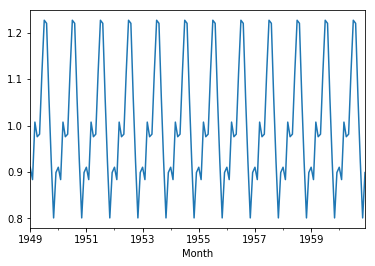

In [13]:
# seasonal
result.seasonal.plot()

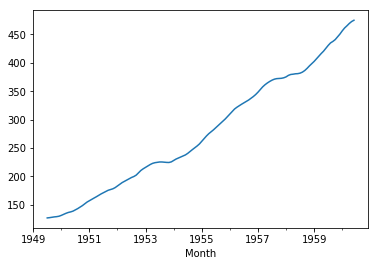

In [14]:
# trend
result.trend.plot()

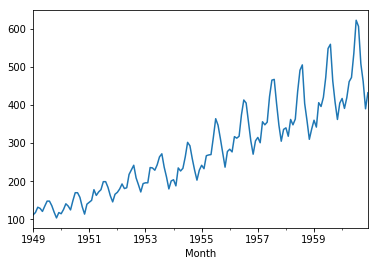

In [15]:
#observed
result.observed.plot()

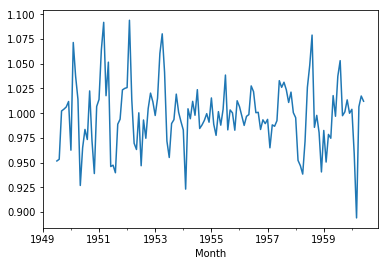

In [16]:
# residual/noise
result.resid.plot()

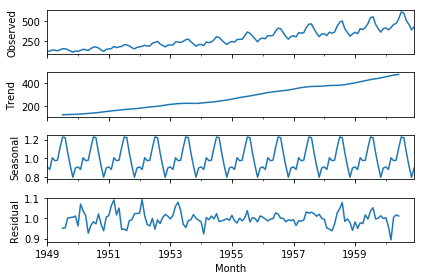

In [19]:
# Set fig = result.plot() if you don't, you'll get a duplicate plots
fig = result.plot()

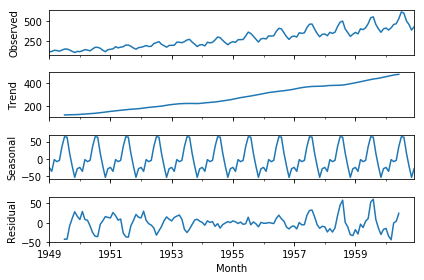

In [20]:
# Additive Model
result = seasonal_decompose(airline['Thousands of Passengers'], model='addative')
fig = result.plot()